NAME : ASMI JAIN

DIV : TY-3

ROLL NO : 25

BATCH : B

SUBJECT: DWM

EXPERIMENT- 7

Aim: Implementation of Data Discretization & Visualization using Python codes


**Introduction**

This experiment implements data discretization techniques to transform continuous numerical variables into categorical ones, a critical preprocessing step in data mining and analysis. Discretization simplifies complex data while preserving essential patterns, making subsequent analysis more efficient and interpretable. Through Python implementation, we explore three common discretization methods: Equal Width Binning, Equal Frequency Binning, and K-means clustering, applied to synthetic age and income data. These methods divide continuous values into discrete intervals using different strategies, each with unique advantages for data analysis and visualization.

**Algorithm**

Data Generation: Create synthetic age and income data with correlation.

Exploratory Analysis: Visualize and summarize original continuous data.

Discretization Implementation:

1.Equal Width: Divide data range into intervals of equal size.

2.Equal Frequency: Create bins with equal number of observations.

3.K-means: Group data points based on similarity.


Transformation: Convert continuous values to categorical bins.

Visualization: Compare distributions before and after discretization

Evaluation: Analyze the effectiveness of each method through statistical measures



Original Data (First 5 rows):
    Age        Income
0  42.0  57892.663213
1  33.0  63641.249607
2  45.0  26021.486393
3  58.0  68444.538550
4  31.0  23240.361463

Summary Statistics:
              Age         Income
count  500.000000     500.000000
mean    35.112000   37828.445055
std     14.617483   19414.803870
min      0.000000       0.000000
25%     24.750000   25050.880386
50%     35.000000   37340.154223
75%     45.000000   50124.919917
max     93.000000  120446.845524

Discretized Data (First 5 rows):
    Age        Income Age_EqualWidth Income_EqualWidth Age_EqualFreq  \
0  42.0  57892.663213          37-55       48178-72268            Q4   
1  33.0  63641.249607          18-37       48178-72268            Q3   
2  45.0  26021.486393          37-55       24089-48178            Q4   
3  58.0  68444.538550          55-74       48178-72268            Q5   
4  31.0  23240.361463          18-37           0-24089            Q2   

  Income_EqualFreq Age_KMeans Income_KMeans  
0      

<ipython-input-1-fad3f01f2e3f>:191: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('Age_EqualWidth')['Income'].mean())
<ipython-input-1-fad3f01f2e3f>:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('Age_EqualFreq')['Income'].mean())
<ipython-input-1-fad3f01f2e3f>:207: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Equal Width': data.groupby('Age_EqualWidth')['Age'].mean(),
<ipython

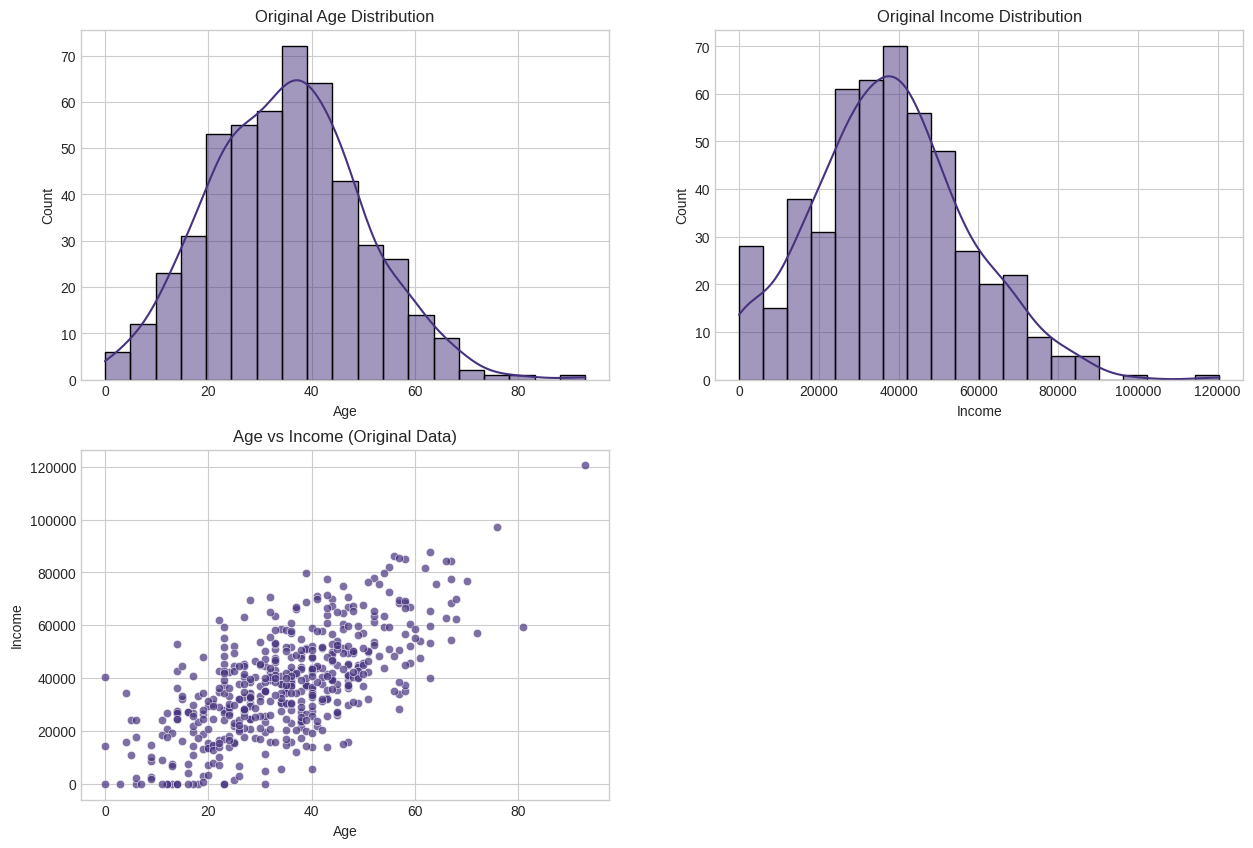

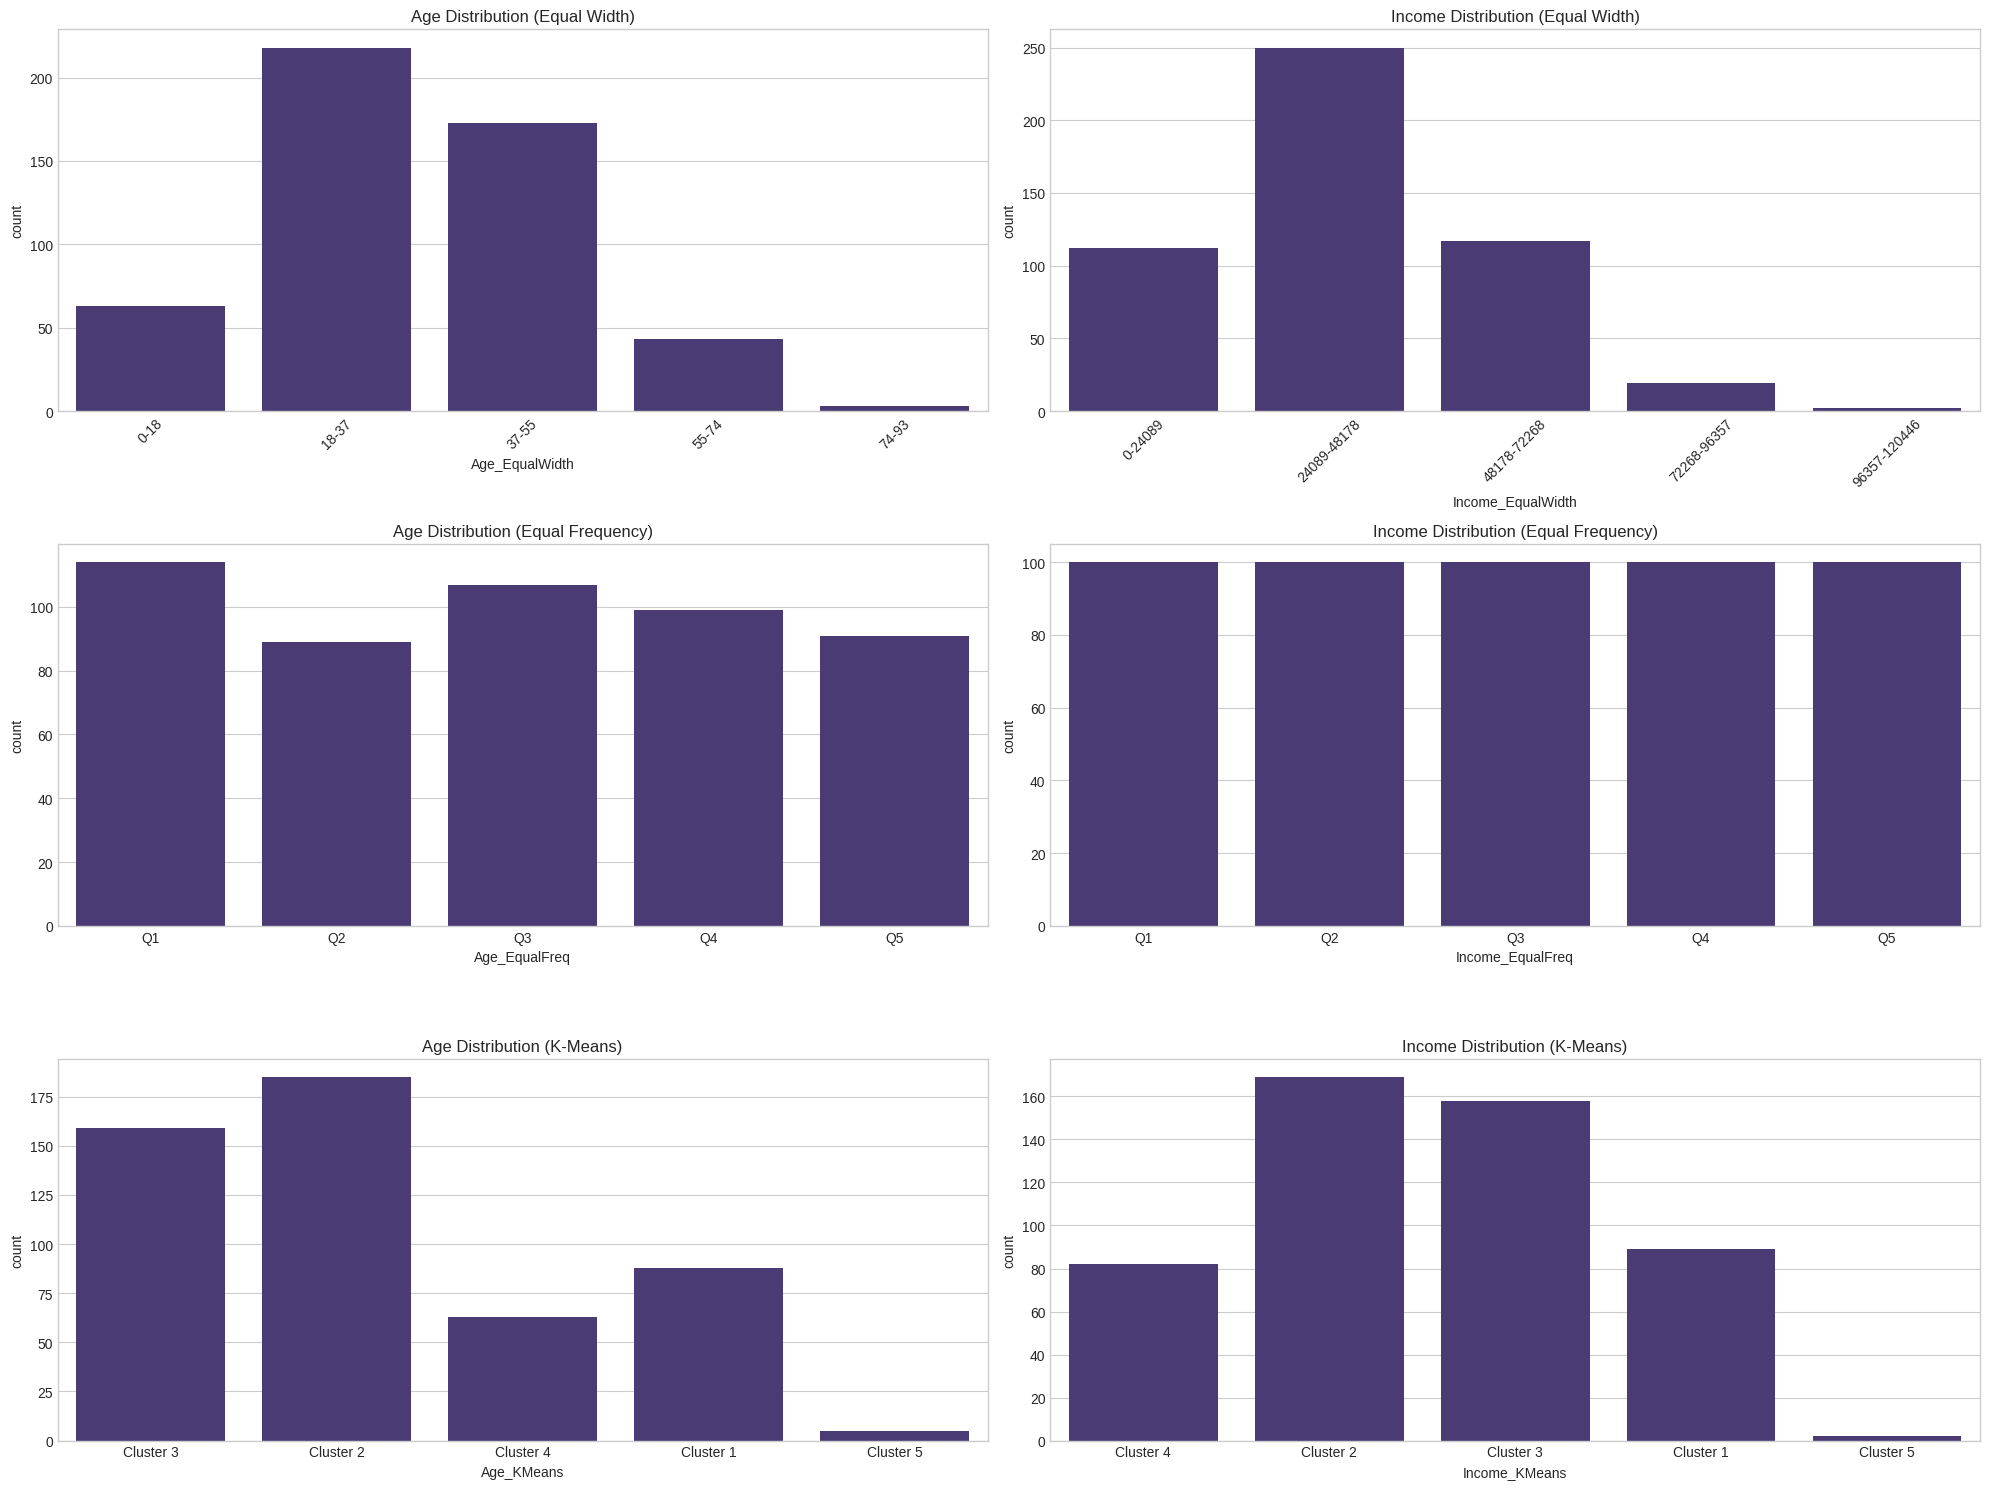

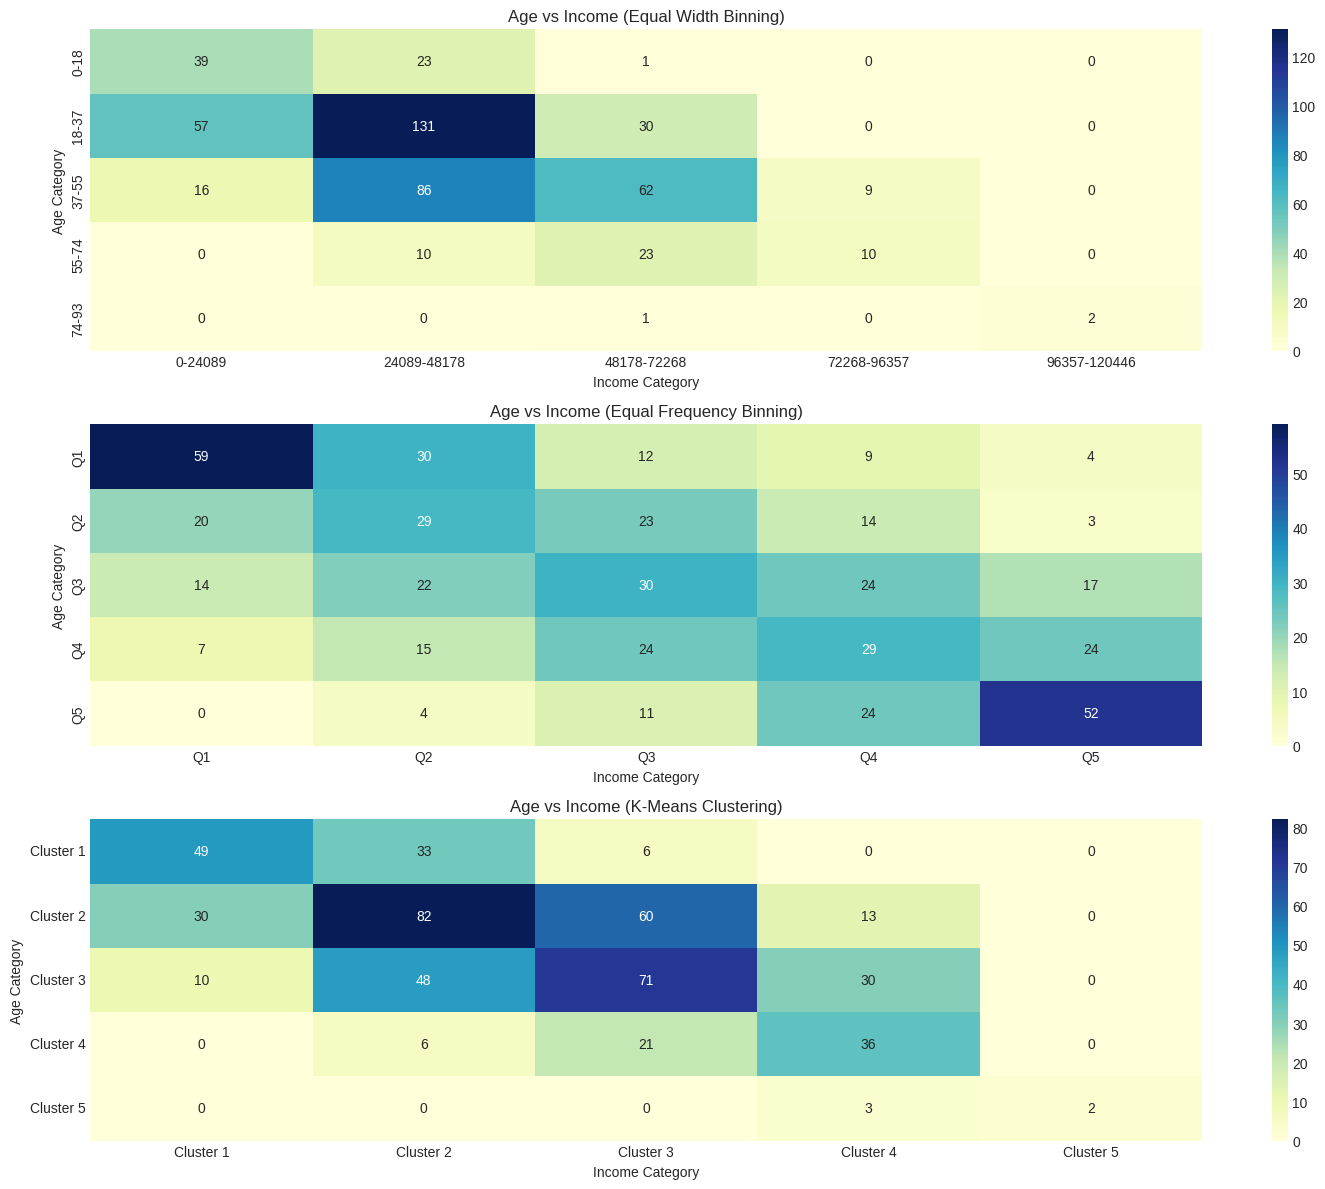

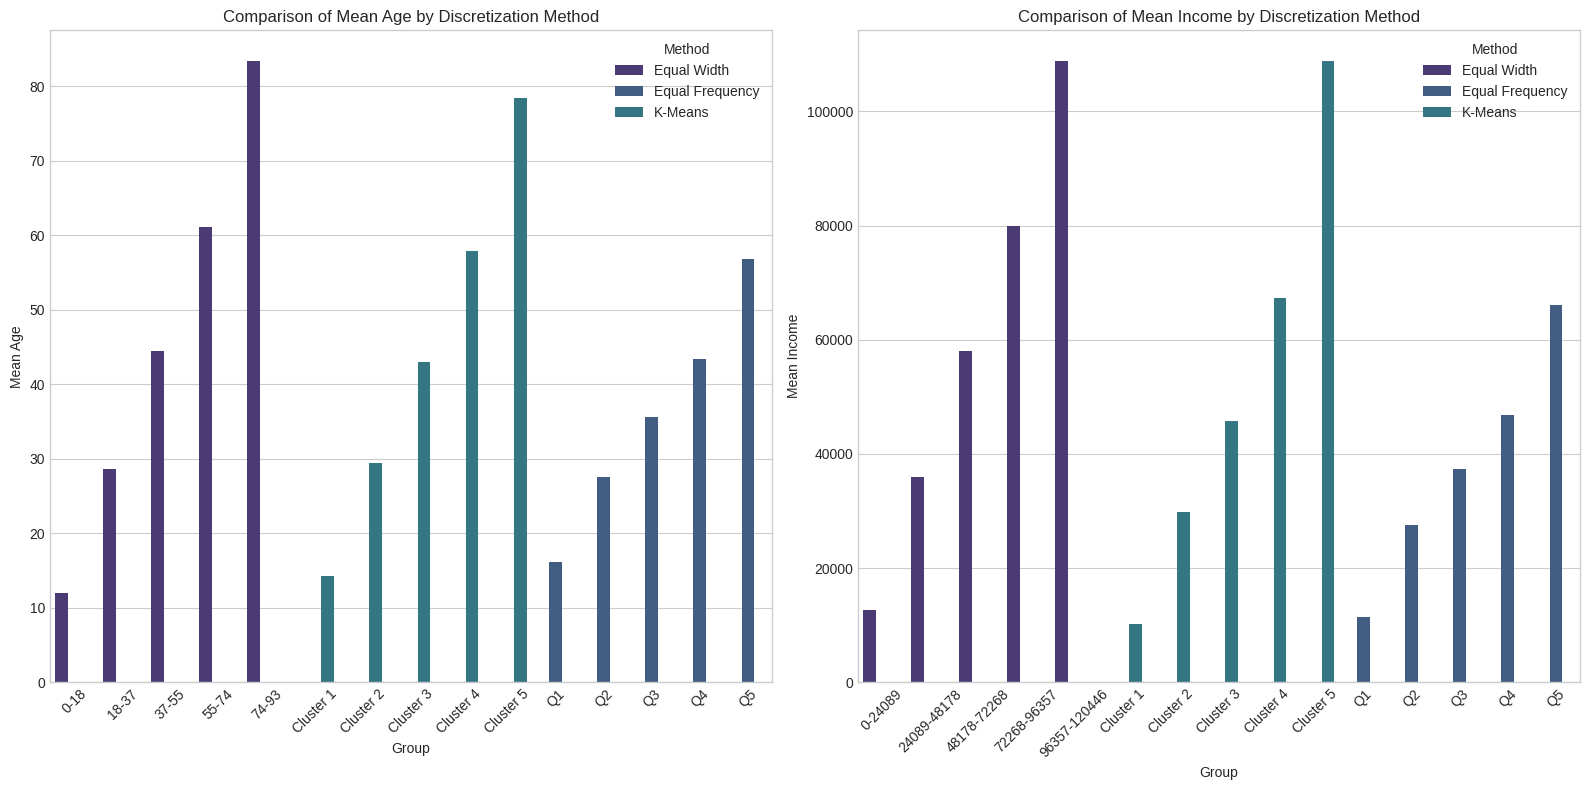


=== Summary of Discretization Methods ===
1. Equal Width Binning:
   - Pros: Simple to implement and understand
   - Cons: Sensitive to outliers, may result in uneven distribution

2. Equal Frequency Binning:
   - Pros: Ensures even distribution of data points across bins
   - Cons: May group very different values together if data is skewed

3. K-Means Clustering:
   - Pros: Creates natural groupings based on data distribution
   - Cons: More complex, results may vary with different initializations

=== Conclusion ===
The choice of discretization method depends on your specific analysis goals:
- Use Equal Width when the actual value ranges are important
- Use Equal Frequency when balanced bin sizes are more important than the ranges
- Use K-Means when natural clusters in the data are more meaningful


In [ ]:
# Data Discretization and Visualization Experiment
# --------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Set the style for our visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Step 1: Create sample data
np.random.seed(42)  # For reproducibility
n_samples = 500

# Generate a continuous variable (e.g., age)
age = np.random.normal(loc=35, scale=15, size=n_samples)
# Ensure all values are positive and round to make it realistic
age = np.clip(age, 0, 100).round()

# Generate income data with some correlation to age
base_income = 20000 + (age - 18) * 1000
noise = np.random.normal(0, 15000, size=n_samples)
income = base_income + noise
# Ensure income values are reasonable
income = np.clip(income, 0, 200000)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Income': income
})

# Step 2: Data Exploration before Discretization
print("Original Data (First 5 rows):")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Visualize the Original Continuous Data
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Original Age Distribution')
plt.xlabel('Age')

# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Income'], kde=True)
plt.title('Original Income Distribution')
plt.xlabel('Income')

# Age vs Income scatter plot
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Income', data=data, alpha=0.7)
plt.title('Age vs Income (Original Data)')
plt.xlabel('Age')
plt.ylabel('Income')

# Step 4: Data Discretization Methods

# Method 1: Equal-Width Binning (Manual Implementation)
# Age discretization with equal width
age_min = data['Age'].min()
age_max = data['Age'].max()
num_bins = 5
bin_width = (age_max - age_min) / num_bins

age_bins = [age_min + i * bin_width for i in range(num_bins + 1)]
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(num_bins)]

data['Age_EqualWidth'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Income discretization with equal width
income_min = data['Income'].min()
income_max = data['Income'].max()
bin_width = (income_max - income_min) / num_bins

income_bins = [income_min + i * bin_width for i in range(num_bins + 1)]
income_labels = [f'{int(income_bins[i])}-{int(income_bins[i+1])}' for i in range(num_bins)]

data['Income_EqualWidth'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Method 2: Equal-Frequency Binning (Quantile-based)
data['Age_EqualFreq'] = pd.qcut(data['Age'], q=num_bins, labels=[f'Q{i+1}' for i in range(num_bins)])
data['Income_EqualFreq'] = pd.qcut(data['Income'], q=num_bins, labels=[f'Q{i+1}' for i in range(num_bins)])

# Method 3: Using sklearn's KBinsDiscretizer for K-means clustering
# K-means discretization for age
kbins_age = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
data['Age_KMeans'] = kbins_age.fit_transform(data[['Age']]).astype(int)
data['Age_KMeans'] = data['Age_KMeans'].map(lambda x: f'Cluster {x+1}')

# K-means discretization for income
kbins_income = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='kmeans')
data['Income_KMeans'] = kbins_income.fit_transform(data[['Income']]).astype(int)
data['Income_KMeans'] = data['Income_KMeans'].map(lambda x: f'Cluster {x+1}')

# Print discretized data
print("\nDiscretized Data (First 5 rows):")
print(data.head())

# Step 5: Analyze the distribution of discretized values
print("\nDistribution of discretized Age (Equal Width):")
print(data['Age_EqualWidth'].value_counts().sort_index())

print("\nDistribution of discretized Income (Equal Width):")
print(data['Income_EqualWidth'].value_counts().sort_index())

print("\nDistribution of discretized Age (Equal Frequency):")
print(data['Age_EqualFreq'].value_counts().sort_index())

print("\nDistribution of discretized Income (Equal Frequency):")
print(data['Income_EqualFreq'].value_counts().sort_index())

print("\nDistribution of discretized Age (K-Means):")
print(data['Age_KMeans'].value_counts().sort_index())

print("\nDistribution of discretized Income (K-Means):")
print(data['Income_KMeans'].value_counts().sort_index())

# Step 6: Visualize the Discretized Data
plt.figure(figsize=(20, 15))

# Visualize Equal Width Binning
plt.subplot(3, 2, 1)
sns.countplot(x='Age_EqualWidth', data=data)
plt.title('Age Distribution (Equal Width)')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
sns.countplot(x='Income_EqualWidth', data=data)
plt.title('Income Distribution (Equal Width)')
plt.xticks(rotation=45)

# Visualize Equal Frequency Binning
plt.subplot(3, 2, 3)
sns.countplot(x='Age_EqualFreq', data=data)
plt.title('Age Distribution (Equal Frequency)')

plt.subplot(3, 2, 4)
sns.countplot(x='Income_EqualFreq', data=data)
plt.title('Income Distribution (Equal Frequency)')

# Visualize K-Means Clustering
plt.subplot(3, 2, 5)
sns.countplot(x='Age_KMeans', data=data)
plt.title('Age Distribution (K-Means)')

plt.subplot(3, 2, 6)
sns.countplot(x='Income_KMeans', data=data)
plt.title('Income Distribution (K-Means)')

plt.tight_layout()

# Step 7: Visualize the relationship between discretized variables
plt.figure(figsize=(15, 12))

# Equal Width Binning
plt.subplot(3, 1, 1)
crosstab_ew = pd.crosstab(data['Age_EqualWidth'], data['Income_EqualWidth'])
sns.heatmap(crosstab_ew, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Age vs Income (Equal Width Binning)')
plt.xlabel('Income Category')
plt.ylabel('Age Category')

# Equal Frequency Binning
plt.subplot(3, 1, 2)
crosstab_ef = pd.crosstab(data['Age_EqualFreq'], data['Income_EqualFreq'])
sns.heatmap(crosstab_ef, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Age vs Income (Equal Frequency Binning)')
plt.xlabel('Income Category')
plt.ylabel('Age Category')

# K-Means Clustering
plt.subplot(3, 1, 3)
crosstab_km = pd.crosstab(data['Age_KMeans'], data['Income_KMeans'])
sns.heatmap(crosstab_km, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Age vs Income (K-Means Clustering)')
plt.xlabel('Income Category')
plt.ylabel('Age Category')

plt.tight_layout()

# Step 8: Evaluate the effectiveness of discretization
# For equal width binning, calculate the mean income for each age group
print("\nMean Income for each Age Group (Equal Width):")
print(data.groupby('Age_EqualWidth')['Income'].mean())

# For equal frequency binning, calculate the mean income for each age group
print("\nMean Income for each Age Group (Equal Frequency):")
print(data.groupby('Age_EqualFreq')['Income'].mean())

# For K-means clustering, calculate the mean income for each age group
print("\nMean Income for each Age Group (K-Means):")
print(data.groupby('Age_KMeans')['Income'].mean())

# Step 9: Create a combined visualization to compare methods
plt.figure(figsize=(16, 8))

# Age group means plot
plt.subplot(1, 2, 1)
age_means = pd.DataFrame({
    'Equal Width': data.groupby('Age_EqualWidth')['Age'].mean(),
    'Equal Frequency': data.groupby('Age_EqualFreq')['Age'].mean(),
    'K-Means': data.groupby('Age_KMeans')['Age'].mean()
}).reset_index()

age_means = pd.melt(age_means, id_vars='index', var_name='Method', value_name='Mean Age')
sns.barplot(x='index', y='Mean Age', hue='Method', data=age_means)
plt.title('Comparison of Mean Age by Discretization Method')
plt.xlabel('Group')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)

# Income group means plot
plt.subplot(1, 2, 2)
income_means = pd.DataFrame({
    'Equal Width': data.groupby('Income_EqualWidth')['Income'].mean(),
    'Equal Frequency': data.groupby('Income_EqualFreq')['Income'].mean(),
    'K-Means': data.groupby('Income_KMeans')['Income'].mean()
}).reset_index()

income_means = pd.melt(income_means, id_vars='index', var_name='Method', value_name='Mean Income')
sns.barplot(x='index', y='Mean Income', hue='Method', data=income_means)
plt.title('Comparison of Mean Income by Discretization Method')
plt.xlabel('Group')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step 10: Summary of methods
print("\n=== Summary of Discretization Methods ===")
print("1. Equal Width Binning:")
print("   - Pros: Simple to implement and understand")
print("   - Cons: Sensitive to outliers, may result in uneven distribution")
print("\n2. Equal Frequency Binning:")
print("   - Pros: Ensures even distribution of data points across bins")
print("   - Cons: May group very different values together if data is skewed")
print("\n3. K-Means Clustering:")
print("   - Pros: Creates natural groupings based on data distribution")
print("   - Cons: More complex, results may vary with different initializations")

print("\n=== Conclusion ===")
print("The choice of discretization method depends on your specific analysis goals:")
print("- Use Equal Width when the actual value ranges are important")
print("- Use Equal Frequency when balanced bin sizes are more important than the ranges")
print("- Use K-Means when natural clusters in the data are more meaningful")

Conclusion

The experiment demonstrates that the choice of discretization method significantly impacts data representation and subsequent analysis. Equal Width binning provides consistent interval sizes but may produce unbalanced bin populations when data is skewed. Equal Frequency binning ensures balanced categories but may group dissimilar values together. K-means creates natural clusters but introduces more complexity. The optimal method depends on specific analysis goals: use Equal Width when value ranges matter, Equal Frequency when balanced categories are important, and K-means when natural groupings in data are most meaningful. Overall, proper discretization enhances data mining by reducing dimensionality while preserving essential patterns for effective knowledge discovery.

 Review Questions :

Q1:How does the process of Equal Width Discretization transform continuous data into discrete categories, and what role does the choice of the number of bins play in the outcome?

Equal Width Discretization and Bin Count
Equal Width Discretization transforms continuous data by dividing the data range into intervals of equal size. The number of bins affects the granularity of categorization - too few bins oversimplifies data patterns, while too many bins may create sparse categories and risk overfitting. An optimal bin count balances information preservation with meaningful groupings.

Q2: What insights can be derived from the histogram of the original continuous data, and how does it help in understanding the distribution of the data after discretization?

Insights from Histogram Visualization
Histograms of original data reveal distribution shape (normal, skewed, bimodal), central tendency, spread, and potential outliers. When comparing original histograms with visualizations of discretized data, you can assess how well the binning preserves important distribution characteristics and whether meaningful distinctions in the data are captured by the chosen bin width.

Q3: What are the potential advantages and limitations of using Equal Width Discretization for continuous data, and how can the choice of bin width affect the analysis of the data?

 Equal Width Discretization - Advantages, Limitations, and Bin Width Effects
Advantages: Simple, interpretable, and consistent across the data range.
Limitations: Sensitive to outliers, may create unevenly populated bins, and ignores the natural distribution of data.
Bin width effects: Wider bins simplify but may hide patterns; narrower bins preserve detail but may create sparse categories. The choice directly impacts information retention, pattern visibility, and the statistical significance of subsequent analyses.

GITHUB LINK : https://github.com/asmi-04/DWM-ASMI-25.git